

# Statistics
## Yoav Ram

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats
import scipy.special as spec
import statsmodels.api as sm
from statsmodels.formula.api import ols
import urllib.request
import os.path
import zipfile
import pandas as pd
import seaborn as sns
sns.set(
    style='white',
    context='talk'
)
np.random.seed(847)

Some of the presented exercises follow the book [IPython Cookbook](http://ipython-books.github.io/cookbook/) by [Cyrille Rossant](http://cyrille.rossant.net/).

# Hypothesis testing recap


Given a bunch of observations, we might want to test a certain assumption about the population, named null hypothesis ($H_0$) against an *alternative hypothesis* ($H_1$). 

Steps:
1. State a null and alternative hypothesis.
2. Define a test statistic- which is a quantity estimated from the data (with a known disrtibution assuming $H_0$).
3. Choose the level of significance  (typically 0.05)
4. Perform the experiment and calculate the test statistic. Employ the PDF (probability density function) for continuous variables or PMF (probability mass function) for discrete variables to determine if the probability of obtaining the test statistic or a more extreme value (referred to as a p-value) falls below the specified significance level. If it does, reject the null hypothesis in favor of the alternative hypothesis.


## **Coin flip example:** 

Imagine tossing a coin with an unknown probability `p` of landing on heads (and repeating it `n` times).
Based on the observations, we might want to test if the coin is fair (i.e., `p`=0.5).

1. $H_0: p = 0.5 $ ;  $H_1: p \ne 0.5$
2. The test statistic is the total count of heads (`x`) out of the `n` tosses. Assuming $H_0$, `x` is distributed as a binomial random variable!
3. Let's choose a significance level of 0.05.

### Binomial random variable recap
A binomial random variable represents the number of successes (usually denoted as `x`) in a fixed number of independent and identical experiments (`n`), each with only two possible outcomes: success or failure. The probability of success is usually denoted by `p` . 
Hence, the distribution of a binomial random variable is defined by two parameters, `n` and `p`.
The PMF gives the probability of obtaining a specific number of successes (`k`) in a fixed number of independent and identical experiments.

The formula for the PMF of a binomial random variable is:

![formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/b872c2c7bfaa26b16e8a82beaf72061b48daaf8e)
![nk](https://wikimedia.org/api/rest_v1/media/math/render/svg/d33401621fb832dd2f9783e80a906d562f669008)

Of course that possible values of `k` range from 0 to `n`.


Let's write a function that flips a coin `n` times and returns the number of times it landed on *head*. It's a special coin - the probability that it falls on *head* is `p`:






In [43]:
def flip(n, p):
    #np.random.seed(3)
    randoms = np.random.random(n) #Generate n random uniform numbers over the interval [0.0, 1.0)
    heads = randoms < p # Create a boolean array
    return heads.sum()

Let's use this function:

In [44]:
n = 100
p = 0.56
x = flip(n, p=p)
x

61

## One sample mean hypothesis tests

As already mentioned, `x` is our test statistic, which is distributed as a binomial random variable according to `H0`. So we create a binomial random variable according to our null hypothesis (i.e., assuming $ p = 0.5 $ ), and we calculate the probability to get the result `x` or anything **more extreme** using the PMF under `H0`. 

In [45]:
p0 = 0.5
H0 = scipy.stats.binom(n, p0) # binomial random variable under the null hypothesis

Let's create a plot for the Probability Mass Function (PMF) of the random variable under the null hypothesis using the pmf function from the scipy library:

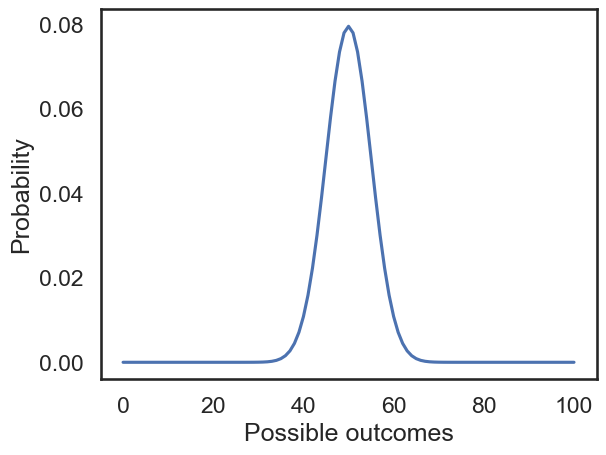

In [46]:
k = np.arange(0, n+1) # numbers from 0 to n
plt.plot(k, H0.pmf(k))
plt.xlabel('Possible outcomes')
plt.ylabel('Probability');

## Ex1

Generate a [geometric random variable](https://en.wikipedia.org/wiki/Geometric_distribution) using the `scipy.stats.geom` function with $ p = 0.1 $.Note that a geometric random variable is a discrete random variable with possible values of (1,+inf).Plot its PMF for values of 1 to 100.

In [47]:
#Your code here

Let's enhance our previous visual representation. We'll include our observed count (`x`) in the plot and examine the question- how extreme is our observation under the null hypothesis $H_0$ 

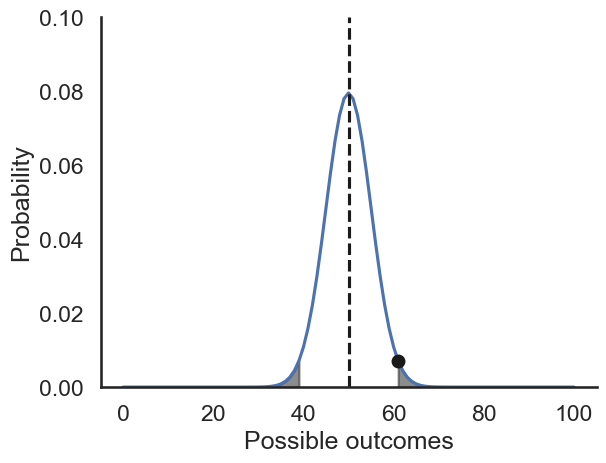

In [49]:

k = np.arange(0, n+1) # numbers from 0 to n

# plot probability of each possible result if null hypothesis is true
plt.plot(k, H0.pmf(k)) 
# Add a black circular marker to indicate the probability associated with our observation (x) if null hypothesis is true
plt.plot(x, H0.pmf(x), 'ok') # 'ok'-> black circular marker
# Adding a dashed line indicating the outcome with highest probability if null hypothesis is true
plt.axvline(n*p0, ls='--', color='k') 
# fill area of results as or less likely then observation
plt.fill_between(k[k>=x], H0.pmf(k[k>=x]), color='k', alpha=0.5)
plt.fill_between(k[k<=n*p0-(x-n*p0)], H0.pmf(k[k<=n*p0-(x-n*p0)]), color='k', alpha=0.5)

plt.ylim(1e-27, 1e-1)
#plt.yscale('log') #A logarithmic scale is applied solely for visualization purposes. To view the data in its original scale, you can comment out this line of code.
plt.xlabel('Possible outcomes')
plt.ylabel('Probability')
sns.despine()

Now let's calculate the p-value manually:

In [50]:
# probability of results as or less likely then observation
low_tail = H0.pmf(k[k<=n*p0-(x-n*p0)]) 
high_tail = H0.pmf(k[k>=x])
# sum of these results is the p-value
#p-value = probability to get this observation or worse if null hypothesis is true
pvalue = low_tail.sum() + high_tail.sum()
print(f'pvalue = {pvalue}')

pvalue = 0.03520020021770478


Instead of doing the p-value calculation yourself, you can use scipy.stats.binom_test. This handy function in the SciPy library tests whether the probability of success in a Bernoulli experiment equals a specified probability (q0).

In [51]:
pval = scipy.stats.binom_test(x, n=n, p=p0)
print("P-value: {0:.2g}, Reject null hypothesis: {1}".format(pval, pval < 0.05))

P-value: 0.035, Reject null hypothesis: True


/var/folders/q8/rdgxsl4523v9jc40pjjzp9g40000gp/T/ipykernel_8529/3059507187.py:1: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  pval = scipy.stats.binom_test(x, n=n, p=p0)


# T-test, Correlation-test, Anova and basic linear regression model 


We will use the *Iris dataset*, which consists of measurements from 150 iris flowers, **representing three different species** : setosa, versicolor, and virginica.


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Iris_germanica_%28Purple_bearded_Iris%29%2C_Wakehurst_Place%2C_UK_-_Diliff.jpg/440px-Iris_germanica_%28Purple_bearded_Iris%29%2C_Wakehurst_Place%2C_UK_-_Diliff.jpg" width="200"/>


In [52]:
filename = '../data/iris_original.csv'
iris_data = pd.read_csv(filename)
iris_data.head()

,petal_length,petal_width,sepal_length,sepal_width,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


## Correlation tests 

<img src="https://files.realpython.com/media/py-corr-1.d13ed60a9b91.png" width="500"/>

Correlation tests are statistical methods used to assess the strength and direction of the relationship between two or more variables. These tests help to determine if there is a statistically significant association between the variables. Two common types of correlation tests include:

[*Pearson's linear correlation*](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient)  (Pearson's r): Measures the linear relationship between two continuous variables. It ranges from -1 to 1, where -1 indicates a perfect negative correlation, 1 indicates a perfect positive correlation, and 0 indicates no linear correlation.

[*Spearman Rank Correlation Coefficient*](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) (Spearman's rho): Assesses the monotonic relationship (whether the variables tend to increase or decrease together, but not necessarily at a constant rate) between two variables. It is less sensitive to outliers than Pearson's correlation.



Let's make a plot showing how petal length relates to petal width.

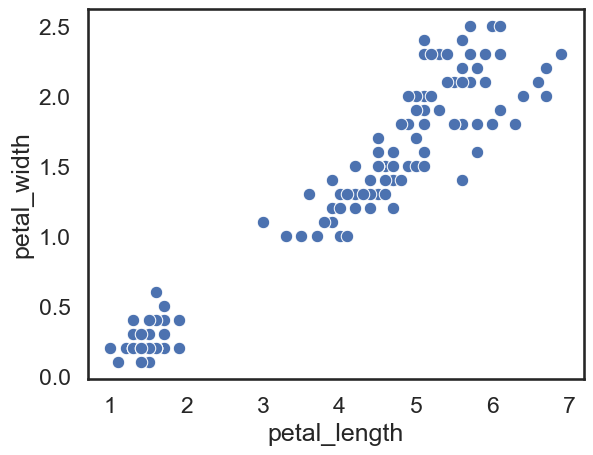

In [11]:

sns.scatterplot(x="petal_length",
                    y="petal_width",
                    #hue="species",
                    data=iris_data);


Looking at the plot, we can see that petal width and petal length are positively correlated!

Let's compute both the Pearson's and Spearman's correlation coefficients, along with their respective p-values, for the relationship between petal length and petal width.


In [12]:
pearson_r, pearson_pval = scipy.stats.pearsonr(iris_data['petal_length'],iris_data['petal_width'])
print(f"Pearson: r = {pearson_r}, p-value = {pearson_pval}")
spearman_r, spearman_pval = scipy.stats.spearmanr(iris_data['petal_length'],iris_data['petal_width'])
print(f"Spearman: r = {spearman_r}, p-value = {spearman_pval}")
# default method is "pearson"

Pearson: r = 0.962865431402796, p-value = 4.675003907328653e-86
Spearman: r = 0.9376668235763412, p-value = 8.156596854126675e-70


A strong positive connection is suggested by a correlation coefficient of 0.96 / 0.93. 

Now let's generate a pairwise correlation matrix among all the numerical columns.

In [13]:
cormat = iris_data[["sepal_width","sepal_length","petal_width","petal_length"]].corr()
print(cormat)

              sepal_width  sepal_length  petal_width  petal_length
sepal_width      1.000000     -0.117570    -0.366126     -0.428440
sepal_length    -0.117570      1.000000     0.817941      0.871754
petal_width     -0.366126      0.817941     1.000000      0.962865
petal_length    -0.428440      0.871754     0.962865      1.000000


We can also generate a heatmap visualizations:

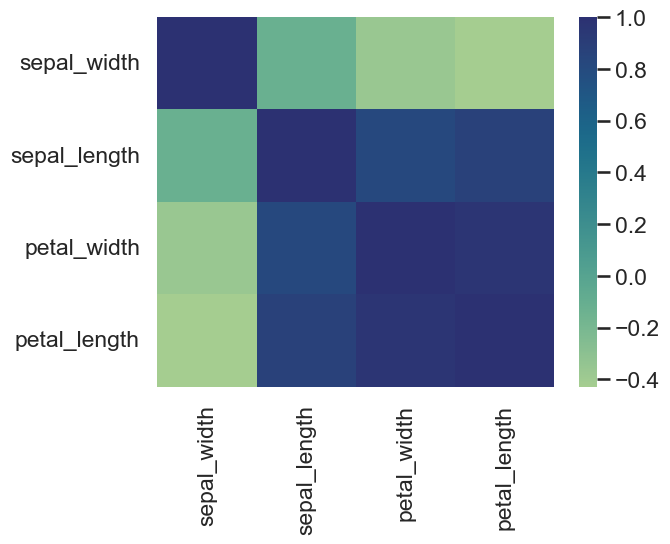

In [14]:
sns.heatmap(cormat, cmap= "crest");


We can deduce that there is a strong positive correlation between petal length and petal width, a moderate positive correlation between sepal length and both petal length and petal width, and a relatively low negative correlation between sepal width and the other variables.

## One sample t-test

A one-sample t-test is a statistical method used to determine whether the mean of a single sample is significantly different from a known or hypothesized population mean. 

Assumption: observations are normally distributed.

Here, we aim to assess the hypothesis that the actual mean petal width of the Setosa iris flowers population is 2.5. 

1. $H_0: \mu = 2.5 $ ;  $H_1: \mu \ne 2.5$ 
2. The test statistic is $ {\displaystyle t={\frac {Z}{s}}={\frac {{\bar {X}}-\mu }{{\hat {\sigma }}/{\sqrt {n-1}}}},
} $.  
According to the null hypothesis, the t statistic follows a [Student's t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution) with n-1 degrees of freedom, where n is the number of samples. 
3. Let's choose a significance level of 0.05.



We can use the `scipy.ttest_1samp` function for a straightforward approach to hypothesis testing, as it computes the t-statistic and p-value automatically. 

In [53]:
sample_petal_width_setosa = (iris_data.loc[iris_data.species=='setosa']['petal_width'])
mu0 = 2.5
ttest_one_sample_result = scipy.stats.ttest_1samp(sample_petal_width_setosa,mu0)
print(ttest_one_sample_result)

TtestResult(statistic=-151.23687158467052, pvalue=4.353916120153066e-67, df=49)


Alternatively, we have the option to manually estimate these values using the provided formula and the `scipy.stats.t.sf` function

In [54]:
n = len(sample_petal_width_setosa.index)
manual_t_statistic = (np.mean(sample_petal_width_setosa)-mu0)/(np.std(sample_petal_width_setosa)/np.sqrt(n-1))
pval = 2 * (scipy.stats.t.sf(np.abs(manual_t_statistic), n - 1))
print(f'Manual t statistic = {manual_t_statistic} p value = {pval} ')

Manual t statistic = -151.23687158467047 p value = 4.353916120153066e-67 


## Independent two sample t-test

A two-sample t-test is a statistical method used to compare the means of two independent groups to determine if there is a significant difference between them. 
Assumptions:
1. Data in each group are normally distributed.
2. The variances for the two groups are equal.

Here, we aim to determine whether the mean of sepal width across the versicolor species is significantly different from the mean of sepal width across the virginica species.

1. $H_0: \mu_1  = \mu_2  $ ;  $H_1: \mu_1 \ne \mu_2$ 

2. The test statistic is ${\displaystyle t={\frac {{\bar {X}}_{1}-{\bar {X}}_{2}}{s_{p}\cdot {\sqrt {{\frac {1}{n_{1}}}+{\frac {1}{n_{2}}}}}}}. }$
According to the null hypothesis, the t statistic follows a [Student's t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution) with $n_1+n_2-2$ degrees of freedom, where n is the number of samples.  ${\displaystyle s_{p}={\sqrt {\frac {(n_{1}-1)s_{X_{1}}^{2}+(n_{2}-1)s_{X_{2}}^{2}}{n_{1}+n_{2}-2}}}}$

3. Let's choose a significance level of 0.05.

We will use the `scipy.stats.ttest_ind` function for a straightforward approach to hypothesis testing, as it computes the t-statistic and p-value automatically.


In [55]:
versicolor_sepal_width = iris_data.loc[iris_data.species=='versicolor']['sepal_width'] 
virginica_sepal_width = iris_data.loc[iris_data.species=='virginica']['sepal_width'] 
scipy.stats.ttest_ind(versicolor_sepal_width,virginica_sepal_width)

TtestResult(statistic=-3.2057607502218186, pvalue=0.0018191004238894803, df=98.0)

Testing model's assumptions:

##### 1. Normality assumption

- Using a QQ plot (quantile-quantile plot) which helps you check if your data follows a certain distribution, usually the normal (bell curve) distribution. It does this by plotting your data’s values against the values you’d expect if the data were perfectly normal. If the points fall roughly along a straight line, your data is close to normal. If they stray away, it means your data might be skewed or have outliers. This is useful because many biological analyses assume data is normally distributed.

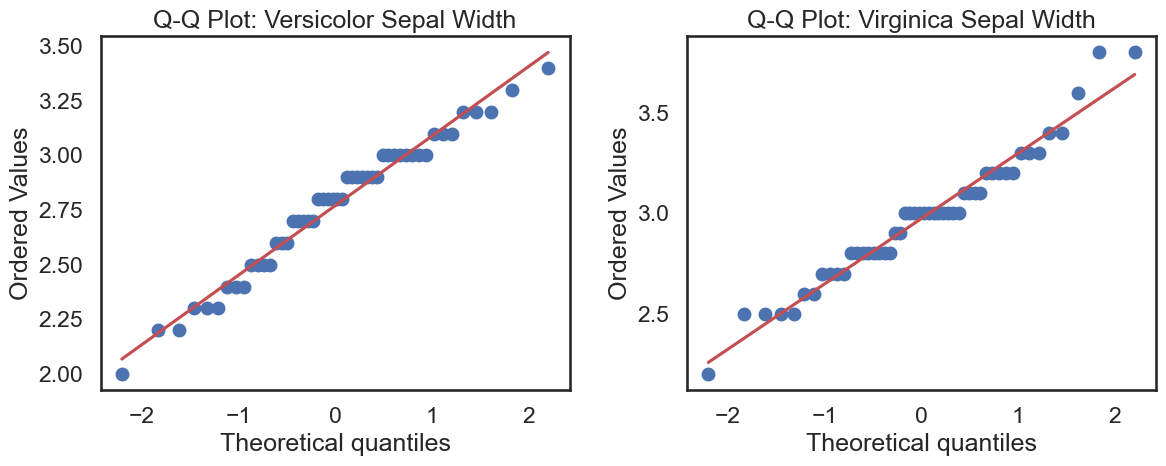

In [57]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Create two subplots for side-by-side Q-Q plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Q-Q plot for Versicolor
stats.probplot(versicolor_sepal_width, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q Plot: Versicolor Sepal Width")

# Q-Q plot for Virginica
stats.probplot(virginica_sepal_width, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot: Virginica Sepal Width")

plt.tight_layout()
plt.show()

Versicolor Sepal Width: dots follow the line well → looks normal.

Virginica Sepal Width: some dots curve away at the top → might be slightly skewed or have larger-than-expected values.



- Using a statistical test

In [56]:
# Statistical normality test
print("Shapiro-Wilk test:")
print("Versicolor:", scipy.stats.shapiro(versicolor_sepal_width))
print("Virginica:", scipy.stats.shapiro(virginica_sepal_width))

Shapiro-Wilk test:
Versicolor: ShapiroResult(statistic=0.9741329550743103, pvalue=0.3379843533039093)
Virginica: ShapiroResult(statistic=0.9673907160758972, pvalue=0.18089871108531952)


In both cases:

The p-values are well above 0.05, so you do not reject the null hypothesis.

This means there's no significant evidence to say the data is non-normal.

##### 2 . Let's test the equal variance assumptions using the bartlett test:



In [59]:
# Bartlett's Test (sensitive to normality violations)
bartlett_stat, bartlett_p = scipy.stats.bartlett(versicolor_sepal_width, virginica_sepal_width)
print(f"Bartlett’s test for equal variances: statistic = {bartlett_stat:.4f}, p-value = {bartlett_p:.4f}")

Bartlett’s test for equal variances: statistic = 0.0363, p-value = 0.8490


There is no significant evidence to suggest that the variances across the groups are different. In other words, the variances can be considered equal.


## Anova


[**ANOVA**](https://en.wikipedia.org/wiki/Analysis_of_variance), or Analysis of Variance, is a statistical test used to analyze the differences among group means in a sample. It assesses whether there are any statistically significant differences between the means of three or more independent (unrelated) groups.
Model assumptions:

(1 )*Normality assumption*: The model residuals should be approximately normally distributed.
What are the residuals? The residual is how much that flower's petal length differs from the species mean.
This assumption is more critical with smaller sample sizes. This matters because ANOVA uses the F-distribution, which assumes normally distributed errors to give accurate p-values.

(2) *Homogeneity of Variances (Homoscedasticity)*: The variances of the different groups should be approximately equal. 

**ANOVA checks whether the variation between group means is large compared to the variation within each group**.

Note that the One-Way Anova is an extension of the two sample t-test for more than two groups.


Note that if we reject the null hypothesis, it doesn't indicate which particular group or groups differ from the others. To identify these differences, a post-hoc analysis is required.

Here, we want to see if the petal lengths of Setosa, Versicolor, and Virginica species are significantly different. To start, we'll use a stripplot to show how the sepal widths are spread in each group.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


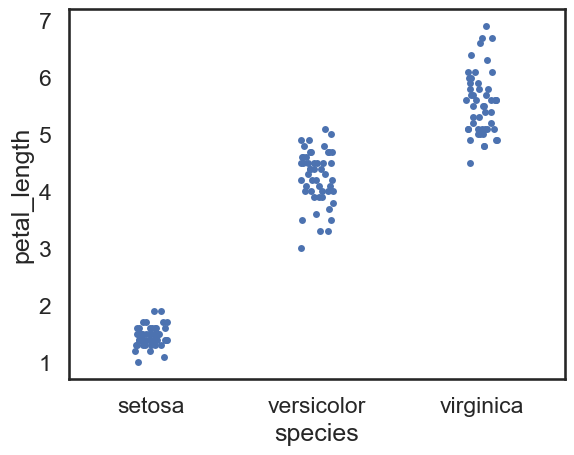

In [39]:
sns.stripplot(data=iris_data, x='species', y='petal_length', jitter=True);

Is the variation between group means large enough that we can say these groups are truly different — beyond just random chance?
| Source of Variation        | Meaning                                                        |
| -------------------------- | -------------------------------------------------------------- |
| **Between-group variance** | How much **group means differ from the grand mean**            |
| **Within-group variance**  | How much **individuals in a group differ from the group mean** |


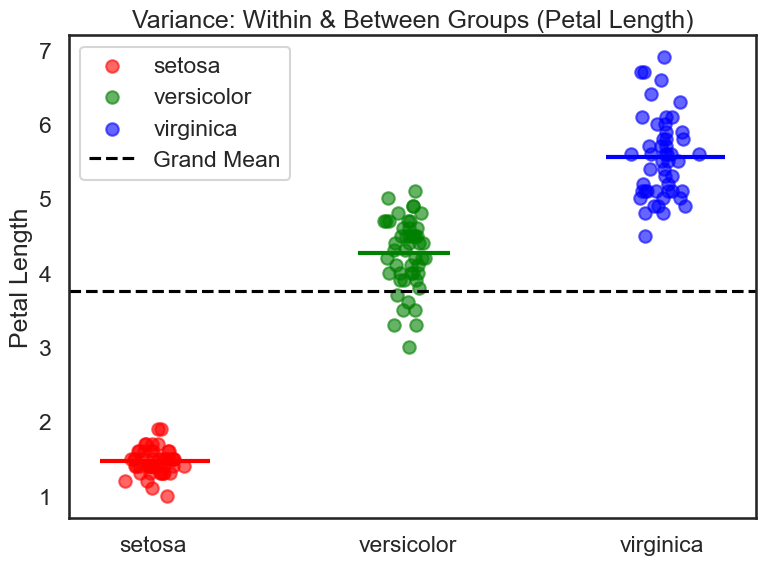

In [40]:
# Compute group and grand means
group_means = iris_data.groupby('species')['petal_length'].mean()
grand_mean = iris_data['petal_length'].mean()

# Create plot
fig, ax = plt.subplots(figsize=(8, 6))
colors = {"setosa": "red", "versicolor": "green", "virginica": "blue"}

for species in iris_data['species'].unique():
    group_data = iris_data[iris_data['species'] == species]
    group_index = list(iris_data['species'].unique()).index(species)
    x_vals = np.random.normal(loc=group_index, scale=0.05, size=len(group_data))
    
    # Plot individual points
    ax.scatter(x_vals, group_data['petal_length'], alpha=0.6, label=species, color=colors[species])
    
    # Plot group mean line
    group_mean = group_data['petal_length'].mean()
    ax.hlines(group_mean, xmin=x_vals.min() - 0.1, xmax=x_vals.max() + 0.1, color=colors[species], linewidth=3)

# Grand mean line
ax.axhline(grand_mean, color='black', linestyle='--', label='Grand Mean')

# Final plot settings
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['setosa', 'versicolor', 'virginica'])
ax.set_title("Variance: Within & Between Groups (Petal Length)")
ax.set_ylabel("Petal Length")
ax.legend()
plt.tight_layout()
plt.show()

**Between-group variance** → Distance between colored lines and the black dashed line.

**Within-group variance** → Vertical spread of the dots within each group

Let's see if the petal lengths means among the three species are *significantly* different using the ANOVA test.

In [33]:
# Compute SSW (Sum of Squares Within Groups)
group_sizes = iris_data['species'].value_counts()

def ssw(group):
    return ((group['petal_length'] - group['petal_length'].mean()) ** 2).sum()

within_species_variance = iris_data.groupby('species').apply(ssw).sum()
between_species_variance = sum(group_sizes[species] * (group_means[species] - grand_mean) ** 2 for species in group_means.index)
total_variance = ((iris_data['petal_length'] - grand_mean) ** 2).sum()

print(f'within_species_variance = {within_species_variance}')
print(f'between_species_variance = {between_species_variance}')
print(f'total_variance = {total_variance}')

within_species_variance = 27.222600000000003
between_species_variance = 437.1028
total_variance = 464.32539999999995


In [19]:
model = ols('petal_length ~ C(species)', data=iris_data).fit()
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(species),2.0,437.1028,218.551400,1180.161182,2.856777e-91
Residual,147.0,27.2226,0.185188,NaN,NaN


* C(species) is the "between species variance". This row measures how much variation in petal length is explained by species differences.The high F-value and very low p-value (~10⁻⁹¹) show that species has a very significant effect on petal length.

* Residual sum of squares measures is the "whithin species variance", measuring how much individuals within the same species differ in petal length (It's the part of the variation not explained by species differences). A low SSW (like 27.22 here) means individuals in each species are pretty consistent in petal length.



| Column       | Meaning                                                                                           |
| ------------ | ------------------------------------------------------------------------------------------------- |
| **df**       | Degrees of freedom: number of independent values contributing to that source of variation.        |
| **sum\_sq**  | Sum of squares: total variation attributed to that source.                                        |
| **mean\_sq** | Mean square = sum\_sq / df (average variation).                                                   |
| **F**        | F-statistic = mean\_sq for group / mean\_sq for residuals.                                        |
| **PR(>F)**   | p-value: probability of getting this F-value or more extreme, **if the null hypothesis is true**. |


### Ex2
Test the model's first assumption (normality of model's residuals) using both  a QQ plot and a parametric normality test.

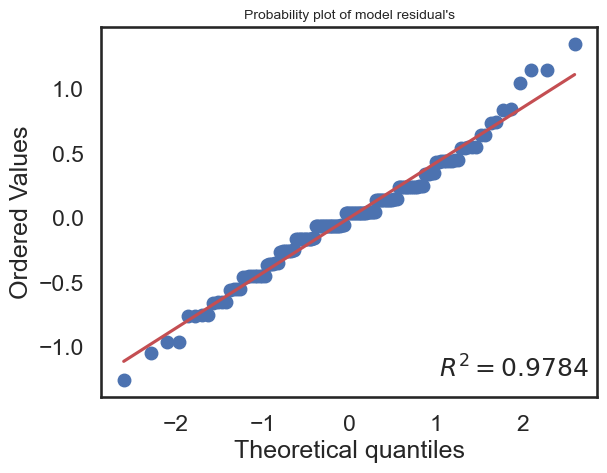

In [20]:
#Your code here

In [21]:
#Your code here

ShapiroResult(statistic=0.9810750484466553, pvalue=0.03676258772611618)


Both the QQ-plot and the Shapiro test indicate the model's residuals are *not normally distributed*. As a result, we should use a non-parametric test.
The [**Kruskal-Wallis H-test**](https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_one-way_analysis_of_variance) is a *non-parametric* alternative to Anova. It tests the null hypothesis that the medians of different groups are the same. It's like a non-parametric version of ANOVA and works with two or more independent samples, even if their sizes are different. 

### Ex3
The Kruskal-Wallis test is a non-parametric statistical test used to compare three or more independent groups to see if they come from the same distribution. It’s based on ranking the data rather than using the raw values, making it useful when the data aren’t normally distributed.

Use the Kruskal-Wallis implementation in `scipy.stats` and apply it as a non-parametric replacement for ANOVA to test the null hypothesis that the medians of the Setosa, Versicolor, and Virginica species are the same.
Print the F statistic and the corresponding p-value.

In [22]:
#Your code here

kruskal F-statistic: 63.571146104163795, p-value 1.5692820940316782e-14


## Linear regerssion


Linear regression model asseses the relationship between a dependent variable and one or more explantory variables by fitting a linear equation to the observed data.

Imagine you’re studying how the amount of sunlight (independent variable x) affects the height of a plant (dependent variable y).You collect data: for several plants, you record how much sunlight they got and how tall they grew. The question is: Can we draw a straight line through these data points that best describes the relationship between sunlight and plant height?

#### Simple linear regression model:

We assume the model: $ y=\alpha +\beta x$, where $\alpha$ is the model's slope and $\beta$ is the mode's intrercept. 

Given n observed data pairs ($x_i,y_i$), we assume that $y_i=\alpha +\beta x_i+\epsilon_i$, where $\epsilon_i$ is an error term. The goal is to find estimated values $\hat{\alpha} , \hat{\beta}$, which provide the best fit to the observed data.
What is the best fit?
The best fit is defined as the one that minimizes the sum of squared residuals (differences between predicted vs. observed values of the dependent variable). 

${\displaystyle ({\hat {\alpha }},\,{\hat {\beta }})=\operatorname {argmin} \left(Q(\alpha ,\beta )\right),}$ 

${\displaystyle Q(\alpha ,\beta )=\sum _{i=1}^{n}{\widehat {\varepsilon }}_{i}^{\,2}=\sum _{i=1}^{n}(y_{i}-\alpha -\beta x_{i})^{2}\ .}$

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/440px-Linear_least_squares_example2.svg.png" width="200"/>

#### Multivariate linear regression model:

We assume a richer model: $ y=\alpha +\beta_1 x_1 +\beta_2 x_2+.. +\beta_p x_p$

Here we have *p* independent variables.

### Main assumptions:

(1) The model's residuals (the differences between the observed and predicted values) are normally distributed. 

(2) Homoscedasticity: Homoscedasticity assumes that the variance of the errors (residuals) is constant across all levels of the independent variable(s). In other words, the spread of the residuals should be roughly the same for all values of the independent variable(s). 


Here, we aim to be able to predict the sepal width based on the other plant characteristics: sepal length, petal width and petal length.
Let's start by plotting the relationship between sepal length and sepal width.

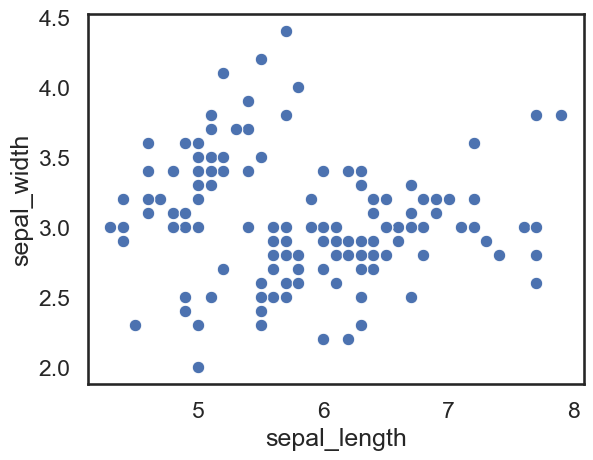

In [23]:
sns.scatterplot(x="sepal_length",
                    y="sepal_width",
                    #hue="species",
                    data=iris_data);

There isn't a clear linear relationship. 
Let's define a linear model in which the dependent variable is the sepal width and the explanatory variable is sepal length. 


We're using a linear regression model to predict:

$Sepal\ Width = \beta_0 + \beta_1 \cdot Sepal\ Length$

In [24]:
model_0 = ols(formula="sepal_width ~ sepal_length", data=iris_data).fit()



Let's obtain the model estimates of intercept and slope:


In [25]:
intercept, slope = model_0.params
print(f"Inferred intercept  = {round(intercept,2)}, Inferred slope  = {round(slope,2)} ")

Inferred intercept  = 3.42, Inferred slope  = -0.06 


### Ex3:

a. Using the intercept and slope, generate a vector of the model's predictions on our dataset. 

b. Plot the regression line (model's predicted dependent variable, sepal width, vs. the independent variable- sepal length) on top of the scatter plot of sepal_width vs. sepal_length.

''

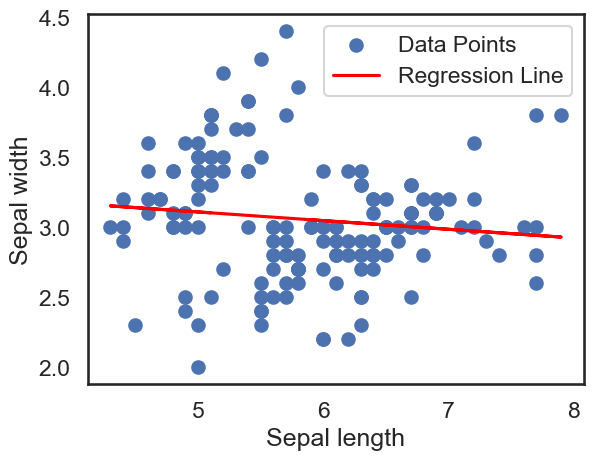

In [26]:
#Your code here

The regression line seems very noisy. We can obtain a summary of the regression performence, in a similar manner as in the R language:

In [28]:
model_0.summary() #print a summary of model performance

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sepal_width   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.074
Date:                Mon, 08 Jul 2024   Prob (F-statistic):              0.152
Time:                        18:48:59   Log-Likelihood:                -86.732
No. Observations:                 150   AIC:                             177.5
Df Residuals:                     148   BIC:                             183.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.4189      0.254     13.484      0.000       2.918       3.920
sepal_length    -0.0619      0.043     -1.440      0.152      -0.147       0.023
==============================================================================
Omnibus:                        2.474   Durbin-Watson:                   1.263
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                1.994
Skew:                           0.243   Prob(JB):                        0.369
Kurtosis:                       3.288   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretation of the results:

🔹 R-squared: 0.014
Only 1.4% of the variation in sepal width is explained by sepal length.

That’s very low, meaning this is not a good predictor in this case.

🔹 Adjusted R-squared: 0.007
Adjusts R² for the number of predictors. Also very low, confirming that this model doesn't explain much.

🔹 F-statistic: 2.074, Prob (F-statistic): 0.152
The F-statistic tests if the model (with predictors) is better than a model with no predictors. Since the p-value is 0.152 (> 0.05), there’s no significant evidence that sepal length explains sepal width.




Now, let's visualize the relationhip between sepal width and sepal length **within** each species.

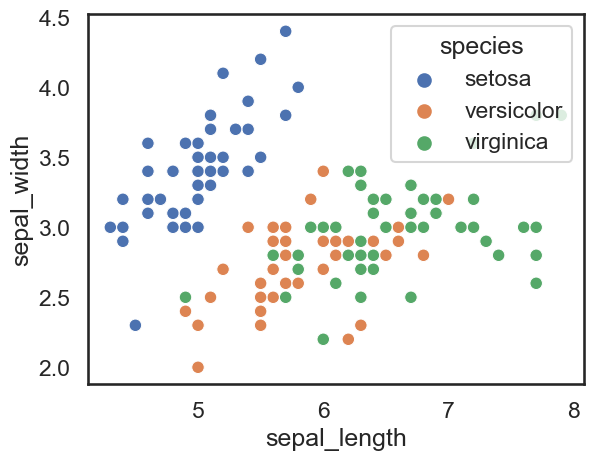

In [29]:
sns.scatterplot(x="sepal_length",
                    y="sepal_width",
                    hue="species",
                    data=iris_data);

Interestingly, we can see that **within** each species there is a linear relationship between sepal length and sepal width!
Let's generate a new model that includes the species as a categorical variable.

In [30]:

model_1 = ols(formula="sepal_width ~ sepal_length+C(species)", data=iris_data).fit()
(model_1.summary()) #print a summary of model performance

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sepal_width   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     64.32
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           1.46e-26
Time:                        18:48:59   Log-Likelihood:                -24.609
No. Observations:                 150   AIC:                             57.22
Df Residuals:                     146   BIC:                             69.26
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.6765      0.235      7.123      0.000       1.211       2.142
C(species)[T.versicolor]    -0.9834      0.072    -13.644      0.000      -1.126      -0.841
C(species)[T.virginica]     -1.0075      0.093    -10.798      0.000      -1.192      -0.823
sepal_length                 0.3499      0.046      7.557      0.000       0.258       0.441
==============================================================================
Omnibus:                        3.680   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.159   Jarque-Bera (JB):                3.253
Skew:                          -0.269   Prob(JB):                        0.197
Kurtosis:                       3.481   Cond. No.                         64.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* R-squared = 0.569 → The model explains ~57% of the variability in sepal width.

* Adjusted R-squared = 0.560 → Still high, even after adjusting for 3 predictors.

* F-statistic = 64.32, p < 0.001 → Model is highly significant.

* All predictors have very low p-values (< 0.001) → They are statistically significant.


Now we obtained a relatively high R^2, and both the sepal length and species obtained very small p-values, indicating they should be included in the model! 
Including species in the model dramatically improves the ability to predict sepal width.
It shows that sepal width differences are largely driven by species, not just by sepal length.

Now let's also add petal length and petal width to the model, and see if we improve the R^2.

In [31]:
model_2 = ols(formula="sepal_width ~ sepal_length+C(species)+petal_length+petal_width", data=iris_data).fit()
#predictions = model.predict(X) 
print(f'R^2 = {np.round(model_2.rsquared,2)}') #print a summary of model performance

R^2 = 0.64


The R^2 improved, again! However, to test if the addition of these variables to the model is *significant*, we should use an [**F test**](https://en.wikipedia.org/wiki/F-test).

* It compares the original model (with fewer variables) to the new model (with the added variable).

* It checks if the reduction in prediction error is large enough to be statistically significant.


In [32]:
F_statistic, p_value, df = (model_2.compare_f_test(model_1))
print(f"F statistic = {round(F_statistic,2)}, p-value= {round(p_value,2)}, degrees of freedom = {df}")

F statistic = 13.01, p-value= 0.0, degrees of freedom = 2.0


We obtained a sifnificant result, indicating that the richer model (which includes the new variables) is better.
 
Note, however, that obtaining higher R^2 does not necessarily indicate a better model.

### Ex4:
As an experiment, try to add 100 *random variables* to the model and see if R^2 improves.

In [33]:
#Your code here

R^2 = 0.89


In [34]:
F_statistic, p_value, df = (model_3.compare_f_test(model_2))
print(f"F statistic = {round(F_statistic,2)}, p-value= {round(p_value,2)}, degrees of freedom = {df}")

F statistic = 1.05, p-value= 0.44, degrees of freedom = 100.0


It turns out that even when adding non-relevant variables to the model it can only **increase** (and not decrease) the R^2!
Each new variable gives the model more flexibility to fit the data.
Even random noise can accidentally line up with some variation in your data — making the model appear better just by chance.
This phenomenon is known as model **overfitting**. It basically means that our model has too many degrees of freedom,enabling it to fit the noise as well!  
The consequence of overfitting is that predictions on new data, coming from the same distribution, will be poor.

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*6vPGzBNppqMHllg1o_se8Q.png" width="800"/>

Hence, we should not use R^2 on our training data as a metric to choose between models, as it leads to overfitting.
What metric should we use instead for linear regression models?

* In case of nested models (such as model_1 and model_2), we can use an F-test (as we did in previous section). 
* For non-nested models we can use [AIC](https://en.wikipedia.org/wiki/Akaike_information_criterion) or [BIC](https://en.wikipedia.org/wiki/Bayesian_information_criterion), which penalize models for high number of parameters. A lower AIC or BIC value indicates a better fit!
For example, using the AIC criterion on the models we created

In [35]:
print(f"model 0 AIC = {round(model_0.aic,2)}")
print(f"model 1 AIC = {round(model_1.aic,2)}")
print(f"model 2 AIC = {round(model_2.aic,2)}")
print(f"model 3 AIC = {round(model_3.aic,2)}")

model 0 AIC = 177.46
model 1 AIC = 57.22
model 2 AIC = 36.31
model 3 AIC = 53.48


We can see that model 2 is the best model based on the AIC criterion.

## Training and Test data sets
A more comprehensive approach to model selection and assessing model performance involves utilizing an independent dataset known as a **test set**. This test set is distinct from the training data and is not used during the model training process. It serves as an estimate of how well our model performs on new, unseen data.
Rather than assessing the model's performance on the data used for training, i.e., the training set, we evaluate it on the test set.  
*We will employ this methodology next week to estimate the performance of our models*.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0e/Traintest.svg/1400px-Traintest.svg.png" width="800"/>

# References

- [IPython Cookbook](http://ipython-books.github.io/cookbook/): IPython Interactive Computing and Visualization Cookbook by Cyrille Rossant.
- [scipy.stats tutorial](http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)
- [Scipy's statistical functions](http://docs.scipy.org/doc/scipy/reference/stats.html)
- [Visualizing distributions in Seaborn](http://web.stanford.edu/~mwaskom/software/seaborn/tutorial/distributions.html)
- [Kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation) on Wikipedia

# Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com) and is part of the [_Python for Engineers_](https://github.com/yoavram/Py4Eng) course.

The notebook was written using [Python](http://python.org/) 3.7.
Dependencies listed in [environment.yml](../environment.yml), full versions in [environment_full.yml](../environment_full.yml).

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)